<h1 style="text-align: center;margin:-7px">Deep Learning</h1>
<h2 style="text-align: center;">Assignment 1: Implement Deep Neural Network from scratch</h2>
<h3 style="text-align: center;margin:7px">Student ID: 20231272</h3>
<h3 style="text-align: center;margin:3px">Student Name: Kollapudi Nagendra Dheeraj</h3>

In [1]:
#Basic File and Matrix Vectorized programming imports
import pandas as pd
import numpy as np

#Standard Imports for Doing Train Test Split and Accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#For Stochaistic Gradient Descent, where batch_size = 1, we need to get random index of observation for training.
import random
np.random.seed(100)

import matplotlib.pyplot as plt
%matplotlib inline

# Perform Feature Scaling over X values
## Z-Normalization 

\begin{equation}
\mu = \frac{1}{N} \sum_{i=1}^N (X_i) 
\end{equation}

\begin{equation}
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (X_i - \mu)^2} 
\end{equation}

\begin{equation}
z = \frac{x - \mu}{\sigma} 
\end{equation}

\begin{align*}
 \text{where:}~  X_i &= \text{column-wise values,} \\
      \mu &= \text{Mean or Average value of X,} \\
      \sigma &= \text{Standard Deviation of the X,} \\
      z &= \text{Normalized Value of X - these values lie in the range of (0-1)} \\
\end{align*}

In [2]:
def z_normalization(X):
    #Calculate the mean - column wise
    mean = np.mean(X, axis=0) 

    #Calculate the standard deviation - column wise
    sd = np.std(X, axis=0) 

    #Implement the formula as shown above:
    return (X - mean) / sd

# Part 1
# Logistic Regression

### References:
- Implementation of Neural Net Logistic Regression from Prof. Michael Madden Lecture Notes (Week 2, slide 24).

## Hypothesis (Sigmoid Function)
\begin{equation}
hypothesis = \frac{1}{1 + e^{-z}}
\end{equation}

\begin{align*}
 \text{where:}~e &= \text{Exponential Power of the value,} \\
      z &= \text{some value whose sigmoid is to be calculated} \\
\end{align*}

## __init__
- Pick some values for $\alpha$, max_iterations, threshold 
- In this case $\alpha$ = 0.001, max_iterations = 1000, threshold = 0.000001

## Train

   ### Initialize Weights
   - W (weight parameter for each column in the observation) is an array of random values chosen from 0 to 0.01.
   - b (bias term) is singular random value between 0 to 1

## Fetch Random Observation for Stochastic GD
\begin{equation}
\begin{gathered}
    \text{random_index} = \text{random.randomint(0, len(observations))} \\
    \text{rand_X} = X[\text{random_index}] \\
    \text{rand_Y} = Y[\text{random_index}] \\
\end{gathered}
\end{equation}

## Forward propagation stage
\begin{equation}
\begin{gathered}
    \hat{y} = hypothesis((W * \text{rand_X}) + b) \\
    \text{j_curr} = -(\text{rand_y} * \log(\hat{y}) + (1 - \text{rand_y}) * \log(\hat{y})) \\
    \text{if }\text{j_curr} - \text{j_prev} <= \text{threshold:}\\
    \text{break from loop}
\end{gathered}
\end{equation}

\begin{align*}
 \text{where:}~ hypothesis &= \text{Hypothesis of the LR i.e. sigmoid function} \\
    \text{rand_X} &= \text{train data} \\
    \text{rand_y} &= \text{train label} \\
    W &= \text{random weights that is to be trained and optimized} \\
    b &= \text{random bias of hidden layer that is trained and optimized} \\
    threshold &= \text{threshold difference in costs needed for convergence} \\
 \text{prediction}~ &= \text{0 or 1 label} \\
\end{align*}

## Gradient Descent stage
\begin{equation}
\begin{gathered}
    \Delta{w} = (\hat{y} - y) * X \\
    \Delta{b}= \hat{y} - rand_y \\
    w \mathrel{-}= α * \Delta{w} \\
    b \mathrel{-}= α * \Delta{b} \\
\end{gathered}
\end{equation}

\begin{align*}
 \text{where:}~ Δw &= \text{differential weight parameter that is to be reduced from original weight parameter} \\
    Δb &= \text{differential bias parameter that is to be reduced from original bias parameter} \\
    α &= \text{learning rate} \\
    \text{rand_y} &= \text{test label or unseen data} \\
    w &= \text{weight parameter} \\
    b &= \text{bias parameter} \\
\end{align*}

## Predict
\begin{equation}
\text{prediction of X record = } hypothesis((x * W) + b) =
    \begin{cases}
     1, & \text{if}\ > 0.5 \\
     0, & \text{otherwise}
    \end{cases}
\end{equation}

\begin{align*}
 \text{where:}~ hypothesis &= \text{Hypothesis of the LR i.e. sigmoid function} \\
      x &= \text{test data or unseen data} \\
      W &= \text{weights trained during training phase} \\
      b &= \text{bias trained during training phase} \\
  \text{prediction}~ &= \text{0 or 1 label} \\
\end{align*}

In [3]:
class LogisticRegression:
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __init__(self, learning_rate=0.001, max_iters=1000, threshold = 0.000001):
        #Initialization: pick values of alpha and max_iter
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.threshold = threshold
        self.costs = []
        self.iterations = []

    def train(self, X, y):
        # set valid values of w, b
        self.w = np.random.normal(0,0.01,X.shape[1])
        self.b = np.random.uniform(0, 1)
        j_prev = 0
        
        #Setting a pretty small value so that log doesn't touch 0
        epilson = 0.000000000000000001
        
        #Iterating over Loop
        for iteration in range(self.max_iters):
            #Selecting some random index to be fetched from training dataset for training weights
            random_index = random.randint(0, X.shape[0]-1)

            # Fetching the observations of that random index.
            rand_X = X[random_index].reshape(X.shape[1], 1)
            rand_y = y[random_index].item()
            
            #Calculating the predicted y using the activation function and weights
            y_hat = self.sigmoid(np.dot(self.w.T, rand_X) + self.b)
            
            #Calculating the cost function
            j_curr = -(rand_y * np.log(y_hat + epilson).item() + (1 - rand_y) * np.log(1 - y_hat + epilson).item())
            
            #Checking if the difference is under the expected threshold so that the convergence could be checked.
            if abs(float(j_curr - j_prev)) <= self.threshold:
                print(f'Break out Loss value:\t{j_curr:.5f}')
                break
            
            if iteration % 10 == 0:
                self.iterations.append(iteration)
                self.costs.append(j_curr)
            
            j_prev = j_curr
            
            #Calculating the delta_w and delta_b for optimize the weights as per the dataset.
            delta_w = np.dot(y_hat - y, X)
            delta_b = y_hat - rand_y
            
            #Updating the weights
            self.w -= self.learning_rate * delta_w.T
            self.b -= self.learning_rate * delta_b
            
        return self.w, self.b

    def predict(self, X):
        #After Finalizing the weights, use the activation over the test value to get predictions
        y_predict = self.sigmoid(np.dot(X, self.w) + self.b)
        
        #Putting hard threshold to check if greater than 0.5 then 1 or else 0.
        y_predict_labels = y_predict > 0.5
        return y_predict_labels.flatten()
    
    def plot_costs(self):
        plt.plot(self.iterations, self.costs, label = 'Costs per Iteration')
        plt.title('Costs computed in the LR Implementation')
        plt.ylabel('Cost')
        plt.xlabel('Iterations')
        plt.legend()
        plt.xticks(self.iterations)
        plt.show()

# Part 2
### References: 
- Loading Dataset of moons and blobs from Prof. Michael Madden Assignment 1 Code Snippets.

## Blobs Dataset

In [4]:
def load_blobs_dataset():
    # Use pandas to read the CSV file as a dataframe
    df = pd.read_csv("blobs250.csv")

    # The y values are those labelled 'Class': extract their values
    y = df['Class'].values

    # The x values are all other columns
    del df['Class']   # drop the 'Class' column from the dataframe
    X = z_normalization(df.values)     # convert the remaining columns to a numpy array
    
    #Splitting the whole dataset into 70%-30% for train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle = True)

    #Splitting the test dataset into 15%-15% for validation and test
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle = True)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

## Moons Dataset 

In [5]:
def load_moons_dataset():
    # Use pandas to read the CSV file as a dataframe
    df = pd.read_csv("moons400.csv")

    # The y values are those labelled 'Class': extract their values
    y = df['Class'].values

    # The x values are all other columns
    del df['Class']   # drop the 'Class' column from the dataframe
    X = z_normalization(df.values)  # convert the remaining columns to a numpy array
    
    #Splitting the whole dataset into 70%-30% for train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle = True)

    #Splitting the test dataset into 15%-15% for validation and test
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle = True)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

## Testing Blobs DataSet on Custom LR

Break out Loss value:	0.00001


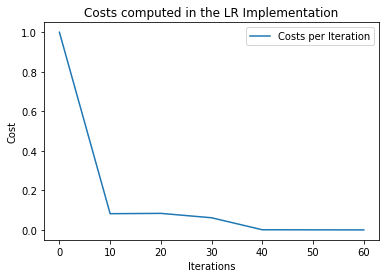


Accuracy on Train: 1.00000
Accuracy on Test: 1.00000


In [6]:
#Initialize Logistic Regression with random weights
logreg = LogisticRegression()

#Loading Blobs Dataset
X_train, X_val, X_test, y_train, y_val, y_test = load_blobs_dataset()

#Pass the training dataset to get optimized weights as per the dataset.
w, b = logreg.train(X_train, y_train)

logreg.plot_costs()

#Fetching Accuracy on the training set
y_predict = logreg.predict(np.concatenate((X_train, X_val), axis=0))
print(f"\nAccuracy on Train: {accuracy_score(np.concatenate((y_train, y_val), axis=0), y_predict):.5f}")

#Fetching Accuracy on the test set
y_predict = logreg.predict(X_test)
print(f"Accuracy on Test: {accuracy_score(y_test, y_predict):.5f}")

## Observations

- This dataset has a smooth drop off in the cost value and after the dip reaches convergence better indicating that the dataset might be linearly separable.
- There is no difference in Train and Test Accuracies, indicating no Overfitting.
- Train and test values are not low, indicating no Underfitting.
- Reaches Highest Accuracy for both Train and Test Datasets.

## Testing Moons DataSet on Custom LR

Break out Loss value:	0.00000


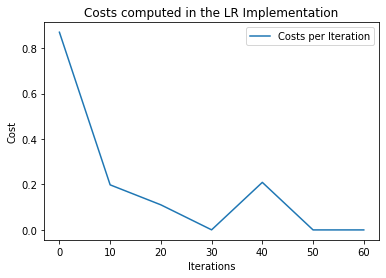


Accuracy on Train: 0.84706
Accuracy on Test: 0.86667


In [7]:
#Initialize Logistic Regression with random weights
logreg = LogisticRegression()

#Loading Moons Dataset
X_train, X_val, X_test, y_train, y_val, y_test = load_moons_dataset()

#Pass the training dataset to get optimized weights as per the dataset.
w, b = logreg.train(X_train, y_train)

logreg.plot_costs()

#Fetching Accuracy on the training set
y_predict = logreg.predict(np.concatenate((X_train, X_val), axis=0))
print(f"\nAccuracy on Train: {accuracy_score(np.concatenate((y_train, y_val), axis=0), y_predict):.5f}")

#Fetching Accuracy on the test set
y_predict = logreg.predict(X_test)
print(f"Accuracy on Test: {accuracy_score(y_test, y_predict):.5f}")

## Observations

- This dataset shows variability in reaching convergence even though dips are seen, highs are also visible indicating data is not linearly separable.
- There is no much difference in Train and Test Accuracies, indicating no Overfitting.
- Train and test values are not low, indicating no Underfitting.
- Sames as above, Reaches Higher Accuracy for Train and Test Dataset values

# Part 3
# Implementing 1 Hidden Layer Neural Network

### References:
- Implementation of Neural Net Logistic Regression from Prof. Michael Madden Lecture Notes (Week 3, slide 19).
- Building a Neural Network with a Single Hidden Layer using Numpy (2020). Available at: https://towardsdatascience.com/building-a-neural-network-with-a-single-hidden-layer-using-numpy-923be1180dbf (Accessed: 28 February 2021).
- Implementing a Neural Network from Scratch in Python – An Introduction (2015). Available at: http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/ (Accessed: 1 March 2021).

## Hypothesis (Sigmoid Function)
\begin{equation}
hypothesis = \frac{1}{1 + e^{-z}}
\end{equation}

\begin{align*}
 \text{where:}~e &= \text{Exponential Power of the value,} \\
      z &= \text{some value whose sigmoid is to be calculated} \\
\end{align*}

## Derivative Hypothesis (Sigmoid Function)'
\begin{equation}
hypothesis' = hypothesis(x) * 1-hypothesis(x)
\end{equation}

\begin{align*}
 \text{where:}~hypothesis(x) &= \text{Value of the Hypothesis from above,} \\
      x &= \text{some value whose derivative sigmoid is to be calculated} \\
\end{align*}

## __init__
- Pick some values for $\alpha$, max_iterations, threshold 
- In this case $\alpha$ = 0.001, max_iterations = 1000, threshold = 0.000001
- layers is an array that provides the no. of nodes that is needed to be created in each layer

## Train

### Initialize Weights
   - W1 (weight parameter of hidden layer) is an array of random values under the range of 0 to 0.01 and the weight size is (number of input nodes * number of hidden nodes)
   - W2 (weight parameter of output layer) is an array of random values under the range of 0 to 0.01 and the weight size is  (number of hidden nodes * number of output nodes)
   - b1 (bias of hidden layer) is a 1D array of values between 0 to 1 whose size is the number of hidden nodes
   - b2 (bias of output layer) is a 1D array of values between 0 to 1 whose size is the number of output nodes

### Fetch Random Observation for Stochastic GD
\begin{equation}
\begin{gathered}
\text{random_index} = \text{random.randomint(0, len(observations))} \\
\text{rand_X} = X[\text{random_index}] \\
\text{rand_Y} = Y[\text{random_index}] \\
\end{gathered}
\end{equation}

### Forward propagation stage
\begin{equation}
\begin{gathered}
\text{z1} = \text{rand_X} * W1 + b1 \\
\text{a1} = hypothesis(z1) \\
\text{z2} = \text{a1} * W2 + b2 \\
\text{a2} = hypothesis(z2) \\
\hat{y} = \text{a2} \\
\text{j_curr} = -(\text{rand_y} * \log(\hat{y}) + (1 - \text{rand_y}) * \log(\hat{y})) \\
\text{if }\text{j_curr} - \text{j_prev} <= \text{threshold: break from loop}\\
\end{gathered}
\end{equation}

\begin{align*}
\text{where:}~ \text{rand_X} &= \text{train data} \\
W1 &= \text{Weights parameter of the hidden layer that are random yet to be optimized and trained} \\
b1 &= \text{Bias parameter of the hidden layer that are random yet to be optimized and trained} \\
hypothesis &= \text{Hypothesis of the LR i.e. sigmoid function} \\
W2 &= \text{Weights parameter of the output layer that are random yet to be optimized and trained} \\
b2 &= \text{Bias parameter of the output layer that are random yet to be optimized and trained} \\
\hat{y} &= \text{Ouptut predicted by the network during training} \\
threshold &= \text{threshold difference in costs needed for convergence} \\
\end{align*}

### Back propagation stage
\begin{equation}
\begin{gathered}
dZ2 = \hat{y} - y \\
dW2 = dZ2 * a1 \\
db2 = dZ2 \\
dZ1 = (hypothesis'(z1)) * (dZ2 \cdot W2) \\
dW1 = dZ1 * X \\
db1 = dZ1 \\
\end{gathered}
\end{equation}

\begin{align*}
\text{where:}~ \hat{y} &= \text{Ouptut predicted by the network during training} \\
y &= \text{train label} \\
a1 &= \text{value of the hidden layer parameters activation(x * w + b)} \\
hypothesis' &= \text{derivative of the hypothesis function} \\
W2 &= \text{Weights from the Output Layer} \\
X &= \text{train data} \\
\end{align*}
    
### Gradient Descent stage
\begin{equation}
\begin{gathered}
W1 \mathrel{-}= α * dW1\\
W2 \mathrel{-}= α * dW2\\
b1 \mathrel{-}= α * db1\\
b2 \mathrel{-}= α * db2\\
\end{gathered}
\end{equation}

\begin{align*}
\text{where:}~ dW1 &= \text{differential weight parameter of hidden layer that is to be reduced from original weights of that layer} \\
dW2 &= \text{differential weight parameter of output layer that is to be reduced from original weights of that layer} \\
db1 &= \text{differential bias parameter of hidden layer that is to be reduced from original bias of that layer} \\
db2 &= \text{differential bias parameter of output layer that is to be reduced from original bias of that layer} \\
α &= \text{learning rate} \\
\end{align*}

## Predict
\begin{equation}
\begin{gathered}
    \text{z1} = \text{rand_X} * W1 + b1 \\
    \text{a1} = hypothesis(z1) \\
    \text{z2} = \text{a1} * W2 + b2 \\
    \text{a2} = hypothesis(z2) \\
\end{gathered}
\end{equation}

\begin{equation}
\begin{gathered}
\text{prediction of rand_X = } a2 =
    \begin{cases}
     1, & \text{if}\ > 0.5 \\
     0, & \text{otherwise}
    \end{cases}
\end{gathered}
\end{equation}

\begin{align*}
 \text{where:}~ hypothesis &= \text{Hypothesis of the LR i.e. sigmoid function} \\
      \text{rand_X} &= \text{test data or unseen data} \\
      W1 &= \text{weights of hidden layer that is trained and optimized} \\
      b1 &= \text{bias of hidden layer that is trained and optimized} \\
      W2 &= \text{weights of output layer that is trained and optimized} \\
      b2 &= \text{bias of output layer that is trained and optimized} \\
  \text{prediction}~ &= \text{0 or 1 label} \\
\end{align*}

In [8]:
class NeuralNet():
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def derivative_sigmoid(self, z):
        return self.sigmoid(z).dot((1-self.sigmoid(z)).T)
    
    def __init__(self, layers, learning_rate=0.01, max_iters=10000, threshold = 0.000001):
        #Initialization: pick values of alpha and max_iter
        self.layers = layers
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.threshold = threshold
        self.params = {}
        self.costs = []
        self.iterations = []
        
        #Actual Weight and bias parameters needed for processing the network
        self.params['W1'] = np.random.normal(0,0.01, (self.layers[0], self.layers[1]))
        self.params['b1'] = np.random.uniform(0, 1, self.layers[1]).reshape(1,self.layers[1])
        self.params['W2'] = np.random.normal(0,0.01, (self.layers[1], self.layers[2]))
        self.params['b2'] = np.random.uniform(0, 1, self.layers[2]).reshape(1,self.layers[2])
        
    def train(self, X, y):
        j_prev = 0
        for iteration in range(self.max_iters):
            #Selecting some random index to be fetched from training dataset for training weights
            random_index = random.randint(0, X.shape[0]-1)

            # Fetching the observations of that random index.
            rand_X = X[random_index].reshape(X.shape[1], 1)
            rand_y = y[random_index].item()
            
            #Forward Propagation Step - Input Layer
            z1 = rand_X.T.dot(self.params['W1']) + self.params['b1']
            a1 = self.sigmoid(z1)
            
            #Forward Propagation Step - Hidden Layer
            z2 = a1.dot(self.params['W2']) + self.params['b2']
            a2 = self.sigmoid(z2)
            
            epilson = 0.000000000000000001
            
            #Calculating the cost function
            j_curr = -(rand_y * np.log(a2 + epilson).item() + (1 - rand_y) * np.log(1 - a2 + epilson).item())
            
            #Checking if the difference is under the expected threshold so that the convergence could be checked.
            if abs(float(j_curr - j_prev)) <= self.threshold:
                print(f'Break out Loss value:\t{j_curr:.5f}')
                break
            
            if iteration % 1000 == 0:
                self.iterations.append(iteration)
                self.costs.append(j_curr)
            
            j_prev = j_curr
            
            #Backward Propagation Step - Output Layer
            dZ2 = a2 - rand_y
            dW2 = dZ2 * a1
            db2 = dZ2
            
            #Backward Propagation Step - Hidden Layer
            dZ1 = self.derivative_sigmoid(z1) * dZ2.dot(self.params['W2'].T)
            dW1 = dZ1.T.dot(rand_X.T)
            db1 = dZ1
            
            #Gradient Descent Stage
            self.params['W1'] -= self.learning_rate * dW1.T
            self.params['W2'] -= self.learning_rate * dW2.T
            self.params['b1'] -= self.learning_rate * db1
            self.params['b2'] -= self.learning_rate * db2
            
    def predict(self, X):
        #Forward Propagation on trained weights and bias to get predictions.
        z1 = X.dot(self.params['W1']) + self.params['b1']
        a1 = self.sigmoid(z1)

        z2 = a1.dot(self.params['W2']) + self.params['b2']
        a2 = self.sigmoid(z2)
        
        return a2 > 0.5
    
    def plot_costs(self):
        plt.plot(self.iterations, self.costs, label = 'Costs per Iteration')
        plt.title('Costs computed in the LR Implementation')
        plt.ylabel('Cost')
        plt.xlabel('Iterations')
        plt.legend()
        plt.xticks(self.iterations)
        plt.show()

### Loading Moons Data and training on Custom NeuralNet

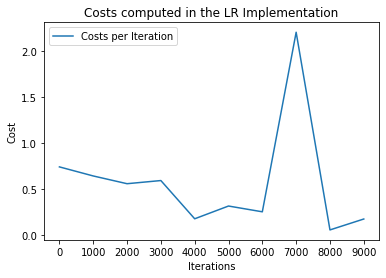

In [9]:
#Loading Moons Dataset
X_train, X_val, X_test, y_train, y_val, y_test = load_moons_dataset()

#Training the network with 4 nodes in hidden layer.
nn = NeuralNet(layers=[X_train.shape[1],4,1])
nn.train(X_train, y_train)
nn.plot_costs()

In [10]:
#Fetching Accuracy on the training set
y_predict = nn.predict(np.concatenate((X_train, X_val), axis=0))
print(f"\nAccuracy on Train: {accuracy_score(np.concatenate((y_train, y_val), axis=0), y_predict):.5f}")

#Fetching Accuracy on the test set
y_predict = nn.predict(X_test)
print(f"Accuracy on Test: {accuracy_score(y_test, y_predict):.5f}")


Accuracy on Train: 0.87647
Accuracy on Test: 0.86667


### Observations:
- As seen here, the cost function spiked and went a sudden low, indicating that the system searched for local minima and then found the global minima.
- There is no much difference in Train and Test Accuracies, indicating no Overfitting.
- Train and test values are not low, indicating no Underfitting.
- The Accuracy for train was increased, indicating that the dataset needed a little complex Hypothesis but for test the accuracy is the same like in the Neural Net case.

### Loading Blobs Dataset and training on Custom NeuralNet

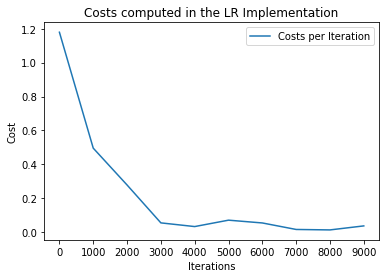

In [49]:
#Loading Blobs Dataset
X_train, X_val, X_test, y_train, y_val, y_test = load_blobs_dataset()

#Training the network with 4 nodes in hidden layer.
nn = NeuralNet(layers=[X_train.shape[1],4,1])
nn.train(X_train, y_train)
nn.plot_costs()

In [12]:
#Fetching Accuracy on the training set
y_predict = nn.predict(np.concatenate((X_train, X_val), axis=0))
print(f"\nAccuracy on Train: {accuracy_score(np.concatenate((y_train, y_val), axis=0), y_predict):.5f}")

#Fetching Accuracy on the test set
y_predict = nn.predict(X_test)
print(f"Accuracy on Test: {accuracy_score(y_test, y_predict):.5f}")


Accuracy on Train: 1.00000
Accuracy on Test: 1.00000


### Observations:
- We can observe that there was incremental dip in cost and after few iterations plateaued little variability.
- There is no difference in Train and Test Accuracies, indicating no Overfitting.
- Train and test values are not low, indicating no Underfitting.
- As seen above there is no change in the Accuracy for this dataset, indicating that the dataset is linearly separable.
- Thus no matter how complex the architecture it was able to figure out the weights and provide predictions.

# Part - 4
# Loading CIFAR Dataset and Training 1 Hidden Layer NN on 2 Classes

### References:
- Loading of cifar code snippets from Prof. Michael Madden Assigment 1 Code Snippets
- Krizhevsky, A. (2019). The CIFAR-10 dataset. [online] Available at: https://www.cs.toronto.edu/~kriz/cifar.html (Accessed 28 Feb 2021).

In [13]:
#Unload the data present in binary format 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#Fetch the batchname and unload the data
def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

#Load the label names
def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [14]:
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [15]:
data = batch1[b'data']
labels = batch1[b'labels']
print ("size of data in this batch:", len(data), ", size of labels:", len(labels))

names = loadlabelnames()

size of data in this batch: 10000 , size of labels: 10000


1032
1030


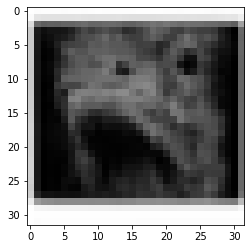

b'bird'


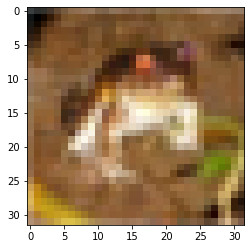

b'frog'


In [16]:
def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (3,32,32) 
    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    picture = picture.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()
    
# Fetch the indexes of the bird and frog
bird_indices=[i for i,x in enumerate(labels) if x == 2]
frog_indices=[i for i,x in enumerate(labels) if x == 6]

#Print the number of elements present
print(len(bird_indices))
print(len(frog_indices))

#Concatenate them so that we can collectively process/transform all the records
indices = np.concatenate((bird_indices, frog_indices), axis = 0)

#Dataset Preparation Step
data_frog_bird = data[indices]
labels_numpy = np.array(labels)
data_frog_bird_labels = labels_numpy[indices]

#Visualizing few records just to check the images and their labels.
for i in range(1031, 1033):
    visualise(data_frog_bird, i)
    print(names[data_frog_bird_labels[i]])

In [17]:
#Used RGB to Gray to transform the data and used np.array to make them 1D
from skimage.color import rgb2gray
data_frog_bird_transformed = np.array(rgb2gray(data_frog_bird))

In [18]:
#Normalizing the data
X = data_frog_bird_transformed/255

#LabelEncoder so that system can work with 0 and 1 labels
category_labelling = {2:0, 6:1}
y = np.array([category_labelling[i] for i in data_frog_bird_labels])

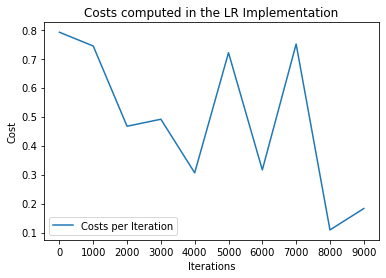

In [32]:
#Fetch train and test values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)

#Training the existing neural net on image data
nn = NeuralNet(layers=[X_train.shape[1],4,1])
nn.train(X_train, y_train)
nn.plot_costs()

In [33]:
#Fetching Accuracy on the training set
y_predict = nn.predict(X_train)
print(f"\nAccuracy on Train: {accuracy_score(y_train, y_predict):.5f}")

#Fetching Accuracy on the test set
y_predict = nn.predict(X_test)
print(f"Accuracy on Test: {accuracy_score(y_test, y_predict):.5f}")


Accuracy on Train: 0.70617
Accuracy on Test: 0.66074


### HyperParameter Tuning:
#### In here we have 2 parameters: Learning Rate and Number of Hidden Layer Nodes.
- Learning Rate: Used the standard LR 0.01 as we want the Neural Network to descend slowly for better chances to find minima
- Number of Hidden Layers: Opted for 4 based on the parity function. As our dataset has 2 columns so 2^2=4. Was the best choice to go and highest accuracy value was also found here.

### Observations:
- The Neural Net Implementation for this same Dataset, as provided better Accuracy for train and test far beyond my expectation.
- We can see that there is alot of hills formed indicating that the cost function plan is not smooth but has alot of local and global minima and system at 8k iterations was able to find better minima.
- There is no much difference in Train and Test Accuracies, indicating no Overfitting.
- Train and test values are not low, indicating no Underfitting.
- Indicating that the dataset like images, voice and text needed complex hypothesis which the Neural Net can satisfies.

# Part - 5
# Deep Learning Enhancements

### References:
- CS231n Convolutional Neural Networks for Visual Recognition (2021). Available at: https://cs231n.github.io/neural-networks-1/ (Accessed: 9 March 2021).
- Activation Functions — ML Glossary documentation (2021). Available at: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html (Accessed: 9 March 2021).
- Coding Neural Network — Dropout (2019). Available at: https://towardsdatascience.com/coding-neural-network-dropout-3095632d25ce (Accessed: 9 March 2021).

### Changing of Activation Function:
- While trying different activation functions, I found LeakyReLU performing better so incorporated it into my code.

#### Leaky ReLU:
\begin{equation}
\text{Leaky_Relu(z) = }
    \begin{cases}
     z, & \text{if z}\ > 0 \\
     \alpha z, & \text{else}
    \end{cases}
\end{equation}

#### Derivative of Leaky ReLU:
\begin{equation}
\text{Leaky_Relu'(z) = }
    \begin{cases}
     1, & \text{if z}\ > 0 \\
     \alpha, & \text{else}
    \end{cases}
\end{equation}

### DropOut Regularization:
- Randomly dropping out a hidden layer node to avoid Overfitting, so in that context both the incoming weights and outgoing weights are set to 0.

\begin{equation}
\begin{gathered}
    \hspace{-50cm} \text{if random_probability < drop_off_prob} :  \\
    \text{random_hidden_node_index} = \text{random.int(0, number of hidden layer nodes)} \\
    \text{W1[random_hidden_node_index]} = 0 \\
    \text{W2[random_hidden_node_index]} = 0 \\
\end{gathered}
\end{equation}


\begin{align*}
 \text{where:}~ \text{drop_off_index} &= \text{Value between 0 to 1 that controls the times of regularization during training.} \\
      \text{random_hidden_node_index} &= \text{random number from 0 to no. of hidden which indicates the node to dropped out} \\
      W1 &= \text{weights of hidden layer that is trained and optimized} \\
      W2 &= \text{weights of output layer that is trained and optimized} \\
\end{align*}

In [46]:
class NeuralNet_Enhanced():
    def leaky_relu(self,z):
        return np.maximum(0.01 * z, z)
    
    def derivative_leaky_relu(self,z):
        dz = np.ones_like(z)
        dz[z < 0] = 0.01
        return dz
    
    def __init__(self, layers, learning_rate=0.01, max_iters=10000, threshold = 0.000001):
        #Initialization: pick values of alpha and max_iter
        self.layers = layers
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.threshold = threshold
        self.params = {}
        self.costs = []
        self.iterations = []
        
        #Actual Weight and bias parameters needed for processing the network
        self.params['W1'] = np.random.normal(0,0.01, (self.layers[0], self.layers[1]))
        self.params['b1'] = np.random.uniform(0, 1, self.layers[1]).reshape(1,self.layers[1])
        self.params['W2'] = np.random.normal(0,0.01, (self.layers[1], self.layers[2]))
        self.params['b2'] = np.random.uniform(0, 1, self.layers[2]).reshape(1,self.layers[2])
    
    def drop_out_reg(self):
        #Check if the generated prob is above the drop prob and then randomly set hidden node weights to 0
        if round(random.uniform(0.1, 1.0), 2) < 0.2:
            random_hidden_node_index = random.randint(0, self.layers[1]-1)
            self.params['W1'][random_hidden_node_index] = np.zeros(self.layers[1])
            self.params['W2'][random_hidden_node_index] = np.zeros(self.layers[2])
    
    def train(self, X, y):
        j_prev = 0
        for iteration in range(self.max_iters):
            #Performing Drop Out Regularization at the beginning of each iteration
            self.drop_out_reg()

            #Selecting some random index to be fetched from training dataset for training weights
            random_index = random.randint(0, X.shape[0]-1)

            # Fetching the observations of that random index.
            rand_X = X[random_index].reshape(X.shape[1], 1)
            rand_y = y[random_index].item()
            
            #Forward Propagation Step - Hidden Layer
            z1 = rand_X.T.dot(self.params['W1']) + self.params['b1']
            a1 = self.leaky_relu(z1)
            
            #Forward Propagation Step - Output Layer
            z2 = a1.dot(self.params['W2']) + self.params['b2']
            a2 = self.leaky_relu(z2)
            
            epilson = 0.000000000000000001
            
            #Calculating the cost function
            j_curr = -(rand_y * np.log(a2 + epilson).item() + (1 - rand_y) * np.log(1 - a2 + epilson).item())
            
            #Checking if the difference is under the expected threshold so that the convergence could be checked.
            if abs(float(j_curr - j_prev)) <= self.threshold:
                print(f'Break out Loss value:\t{j_curr:.5f}')
                break
            
            if iteration % 1000 == 0:
                self.iterations.append(iteration)
                self.costs.append(j_curr)
            
            j_prev = j_curr
            
            #Back Propagation Step - Output Layer
            dZ2 = a2 - rand_y
            dW2 = dZ2 * a1
            db2 = dZ2

            #Back Propagation Step - Hidden Layer
            dZ1 = self.derivative_leaky_relu(z1) * dZ2.dot(self.params['W2'].T)
            dW1 = dZ1.T.dot(rand_X.T)
            db1 = dZ1
            
            #Gradient Descent Step
            self.params['W1'] -= self.learning_rate * dW1.T
            self.params['W2'] -= self.learning_rate * dW2.T
            self.params['b1'] -= self.learning_rate * db1
            self.params['b2'] -= self.learning_rate * db2
            
    def predict(self, X):
        #Forward Propagation on trained weights and bias to get predictions.
        z1 = X.dot(self.params['W1']) + self.params['b1']
        a1 = self.leaky_relu(z1)

        z2 = a1.dot(self.params['W2']) + self.params['b2']
        a2 = self.leaky_relu(z2)
        
        return a2 > 0.5
    
    def plot_costs(self):
        plt.plot(self.iterations, self.costs, label = 'Costs per Iteration')
        plt.title('Costs computed in the LR Implementation')
        plt.ylabel('Cost')
        plt.xlabel('Iterations')
        plt.legend()
        plt.xticks(self.iterations)
        plt.show()

<ipython-input-46-16e8807e78d6>:57: RuntimeWarning: invalid value encountered in log
  j_curr = -(rand_y * np.log(a2 + epilson).item() + (1 - rand_y) * np.log(1 - a2 + epilson).item())


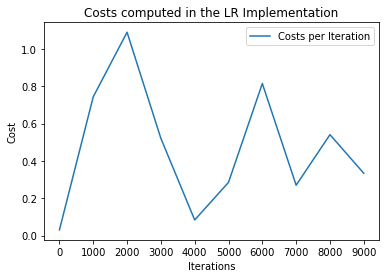

In [47]:
nn_e = NeuralNet_Enhanced(layers=[X_train.shape[1],4,1])
nn_e.train(X_train, y_train)
nn_e.plot_costs()

In [48]:
#Fetching Accuracy on the training set
y_predict = nn_e.predict(X_train)
print(f"\nAccuracy on Train: {accuracy_score(y_train, y_predict):.5f}")

#Fetching Accuracy on the test set
y_predict = nn_e.predict(X_test)
print(f"Accuracy on Test: {accuracy_score(y_test, y_predict):.5f}")


Accuracy on Train: 0.73666
Accuracy on Test: 0.72375


## Observations
- Adding Leaky_Relu and Drop Off Regularization added 6% increase to accuracy to an already higher accuracy.
- Reasoning to this could be in a general Convolutional Step Leaky_Relu might be the perfect activation function and so because of that when we added leaky_relu as an activation function instead of sigmoid it performed better.
- The Architecture might be somewhere overfitting for this dataset, so adding DropOut Regularization internally helped to avoid overfitting and to an extend improve the accuracy by not perfectly fitting on the train data.
- The difference between the Train and test accuracies is less than the above scenario as we have added Drop Off Regularization thus controlling Overfitting, while maintaining higher accuracy.
- There is no much difference in Train and Test Accuracies, indicating no Overfitting.
- Train and test values are not low, indicating no Underfitting.
- Also due to the DropOff Regularization, the cost function has seen unexpected peculiar hills whose decrementing heights. Could be possibly searching for global minima but found a good-enough minima as indicated in the accuracy scores. 